In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
    
import pysfg

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Import some data from a folder
# This load the all_data variable
%run read.py

Reading: 
/home/malte/pysfg/tests/data/ts_gold.dat
/home/malte/pysfg/tests/data/sc_quartz.dat
/home/malte/pysfg/tests/data/cc_gold.dat
/home/malte/pysfg/tests/data/sc_d2o-dopc.dat
/home/malte/pysfg/tests/data/bg_quartz.dat
/home/malte/pysfg/tests/data/bg_d2o-docpe.dat


In [3]:
# Run an example calibration with some static data
%run calibration.py

[3131.78 3130.96 3130.14 ... 1922.98 1922.28 1921.59]


In [4]:
# Use imported data header to perform calibration 
q0 = all_data['/home/malte/pysfg/tests/data/sc_quartz.dat']

qcV = pysfg.calibration.Victor(
    q0['central_wl'], # Central wl of grating during experiment
    q0['vis_wl'], # Central vis wl as set during experiment
    q0['calib_central_wl'], # central wl during calibration
    q0['calib_coeff'], # calibration coeficient in decreasing oder
)
qcV.wavenumber[800: 804]

array([2527.54, 2526.79, 2526.03, 2525.28])

In [5]:
cV = pysfg.get_calibration_from_victor_file('/home/malte/pysfg/tests/data/sc_quartz.dat')
cV.wavenumber

array([3157.63, 3156.81, 3155.99, ..., 1948.84, 1948.14, 1947.44])

In [6]:
pysfg.get_wavenumber_from_victor_file('/home/malte/pysfg/tests/data/sc_quartz.dat')

array([3157.63, 3156.81, 3155.99, ..., 1948.84, 1948.14, 1947.44])

In [21]:
fname = '/home/malte/pysfg/tests/data/sc_quartz.dat'
data = pysfg.read.victor.data_file(fname)

s0 = pysfg.Spectrum(
    intensity = np.median(data['data'][:, :, 0], axis=(0, 1)),
    baseline = 300,
    wavenumber = pysfg.get_calibration_from_victor_header(data).wavenumber
)
s1 = pysfg.Spectrum(
    intensity = np.median(data['data'][:, :, 1], axis=(0, 1)),
    baseline = 300,
    wavenumber = pysfg.get_calibration_from_victor_header(data).wavenumber
)

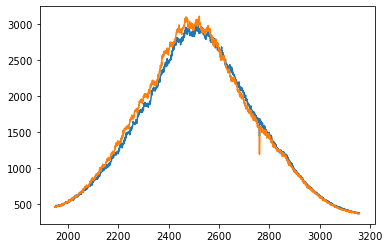

In [23]:
fig, ax = plt.subplots()
plt.plot(s0.wavenumber, s0.intensity)
plt.plot(s1.wavenumber, s1.intensity)
plt.show()